# introductory text (explain: dataset, task)

Network Intrusion Prediction:
	The data set I am working with is a collection of known IoT intrusions, with 1,191,264 records and 47 features. I ended up breaking this data up into smaller segments for training and testing dats. This data has a lot of features and has endless options of what we can do with it.Ill be  Looking for features from the intrusion data that we can accurately predict what type of intrusion this was. This data set has 30 different classes of intrusions, so in the end game finding a few useful features to us  this in a  prediction model

 https://www.kaggle.com/datasets/subhajournal/iotintrusion/data.



# import requisite modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score

# pre-process, analyze dataset

In [2]:
df = pd.read_csv(r'C:\Users\powde\OneDrive\Documents\Western\CS_303_Machine_Learning\FINAL PROJECT\train2.csv', header=None, skiprows=1)
numeric_df = df.select_dtypes(include=['float64', 'int64'])
z = 35
k = 39
x = numeric_df.loc[:, z:k]
y = df.iloc[:, -1].astype(str)


# visualize dataset

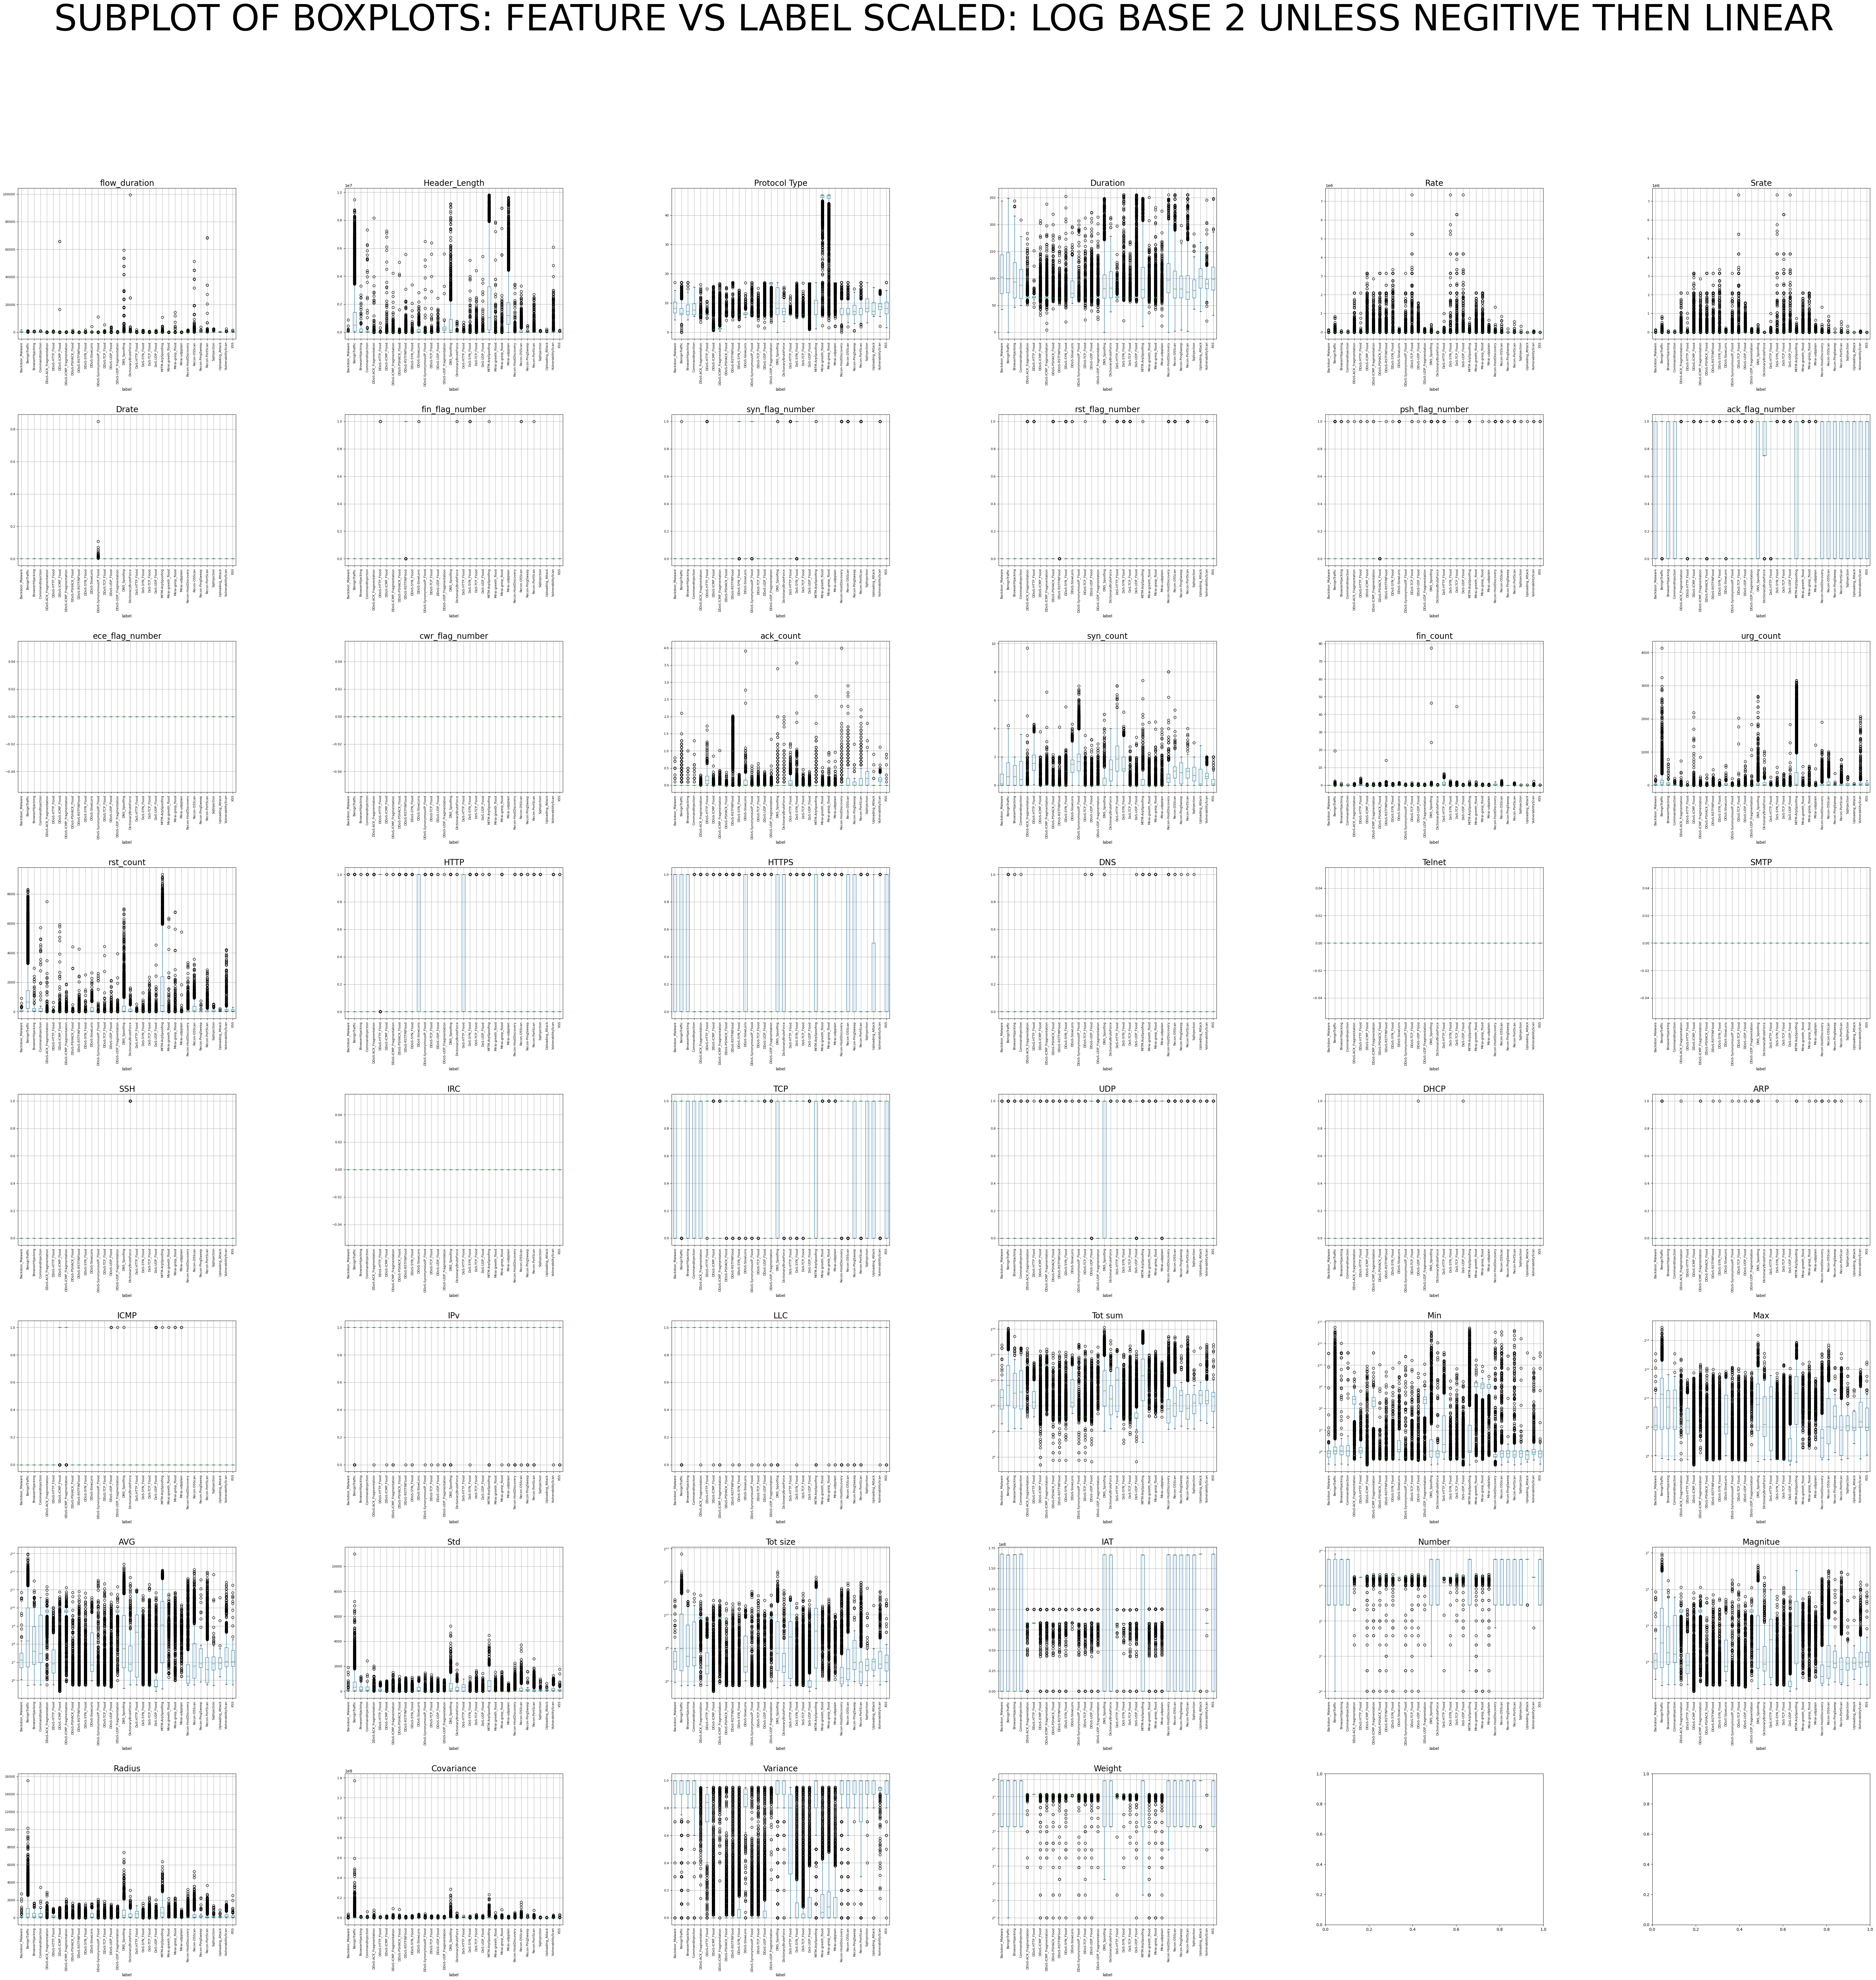

In [4]:
train_data = pd.read_csv(r'C:\Users\powde\OneDrive\Documents\Western\CS_303_Machine_Learning\FINAL PROJECT\Final Project Datasets\IoT_Intrusion.csv')

columns_to_plot = ['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate',
                   'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number',
                   'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
                   'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP',
                   'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
                   'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance',
                   'Variance', 'Weight']

fig, axes = plt.subplots(nrows=8, ncols=6, figsize=(80, 80))
axes = axes.flatten()
i = 0
for column in columns_to_plot:
    train_data.boxplot(column=column, by='label', ax=axes[i], fontsize=8)
    axes[i].set_title(column, fontsize=20)
    
    if train_data[column].min() > 0:
        axes[i].set_yscale('log', base=2)
    else:
        axes[i].set_yscale('linear')
    
    axes[i].tick_params(axis='x', rotation=90)
    i += 1
    
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle("SUBPLOT OF BOXPLOTS: FEATURE VS LABEL SCALED: LOG BASE 2 UNLESS NEGITIVE THEN LINEAR", fontsize=90)
plt.show()
"""
THIS IS ALSO IN FILE AS .png
"""

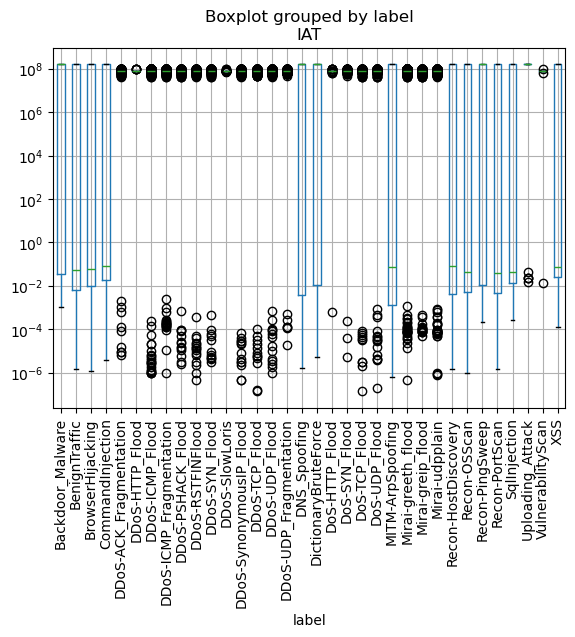

<Figure size 1000x600 with 0 Axes>

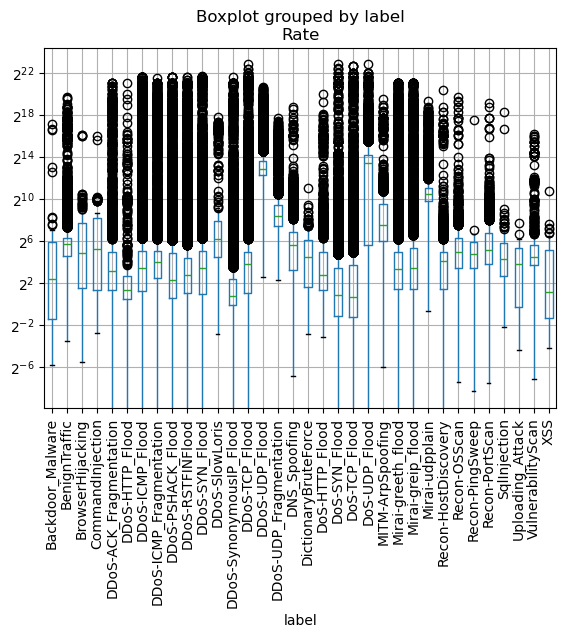

<Figure size 1000x600 with 0 Axes>

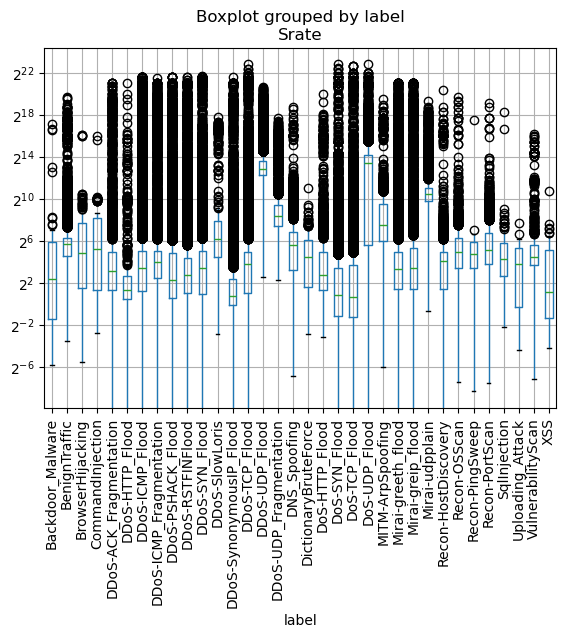

In [10]:
train_data.boxplot(column='IAT', by='label')
plt.yscale('log',base = 10)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6)) 
train_data.boxplot(column='Rate', by='label')
plt.yscale('log',base = 2)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6)) 
train_data.boxplot(column='Srate', by='label')
plt.yscale('log',base = 2)
plt.xticks(rotation=90)
plt.show()

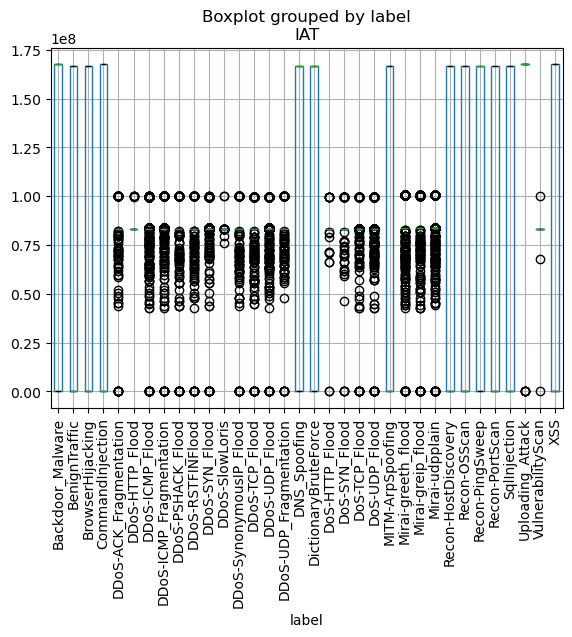

<Figure size 1000x600 with 0 Axes>

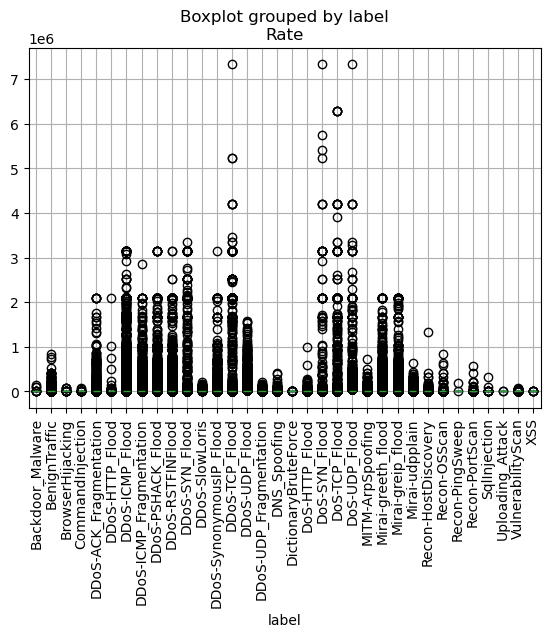

<Figure size 1000x600 with 0 Axes>

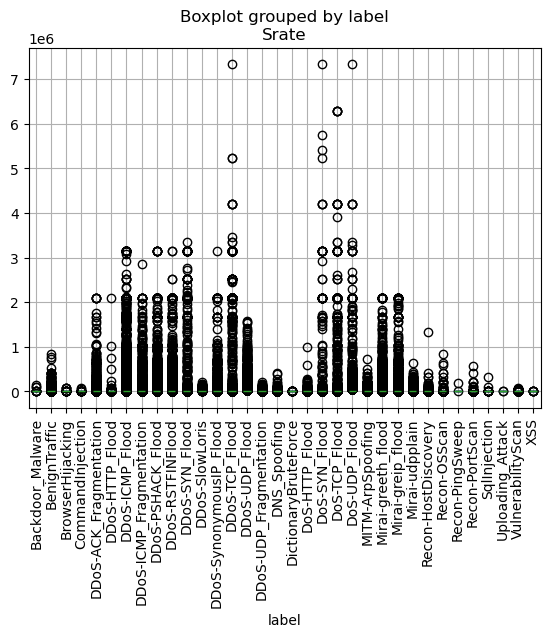

In [9]:
train_data.boxplot(column='IAT', by='label')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6)) 
train_data.boxplot(column='Rate', by='label')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6)) 
train_data.boxplot(column='Srate', by='label')
plt.xticks(rotation=90)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


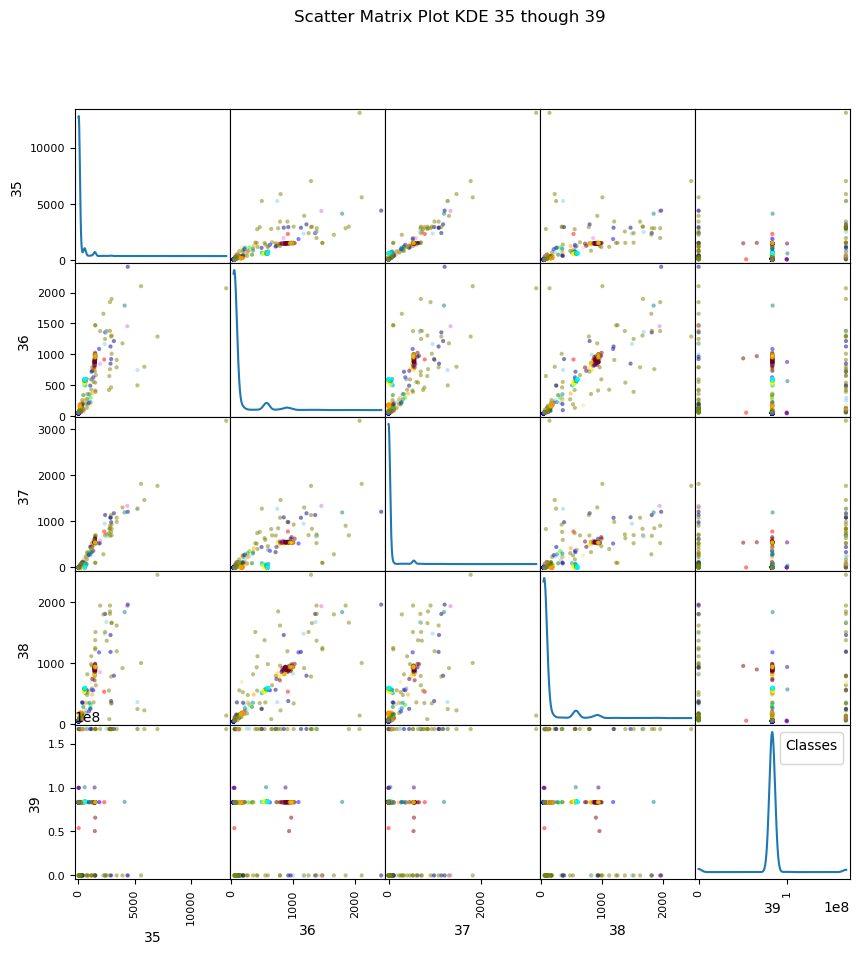

In [3]:
colors = y.map({
    'DDoS-RSTFINFlood': 'red', 
    'DoS-TCP_Flood': 'green', 
    'DDoS-ICMP_Flood': 'blue', 
    'DoS-UDP_Flood': 'orange',
    'DoS-SYN_Flood': 'purple', 
    'Mirai-greeth_flood': 'cyan', 
    'DDoS-SynonymousIP_Flood': 'magenta',
    'Mirai-udpplain': 'yellow', 
    'DDoS-SYN_Flood': 'lime', 
    'DDoS-PSHACK_Flood': 'pink', 
    'DDoS-TCP_Flood': 'brown',
    'DDoS-UDP_Flood': 'gray', 
    'BenignTraffic': 'olive', 
    'MITM-ArpSpoofing': 'navy',
    'DDoS-ACK_Fragmentation': 'gold', 
    'Mirai-greip_flood': 'teal', 
    'DoS-HTTP_Flood': 'violet',
    'DDoS-ICMP_Fragmentation': 'maroon', 
    'Recon-PortScan': 'coral', 
    'DNS_Spoofing': 'skyblue',
    'DDoS-UDP_Fragmentation': 'indigo', 
    'Recon-OSScan': 'limegreen', 
    'XSS': 'salmon', 
    'DDoS-HTTP_Flood': 'lavender',
    'Recon-HostDiscovery': 'khaki', 
    'CommandInjection': 'darkorange', 
    'VulnerabilityScan': 'lightblue',
    'DDoS-SlowLoris': 'tan', 
    'Backdoor_Malware': 'orchid', 
    'BrowserHijacking': 'darkgreen'
})

classes = y.unique()
# Scatter Matrix Plot with colors for each class
scatter_matrix(x, diagonal="kde", figsize=(10, 10), color=colors)
plt.legend(title='Classes', loc='upper right')
plt.suptitle('Scatter Matrix Plot KDE '+ str(z) +" though "+str(k))
plt.show()

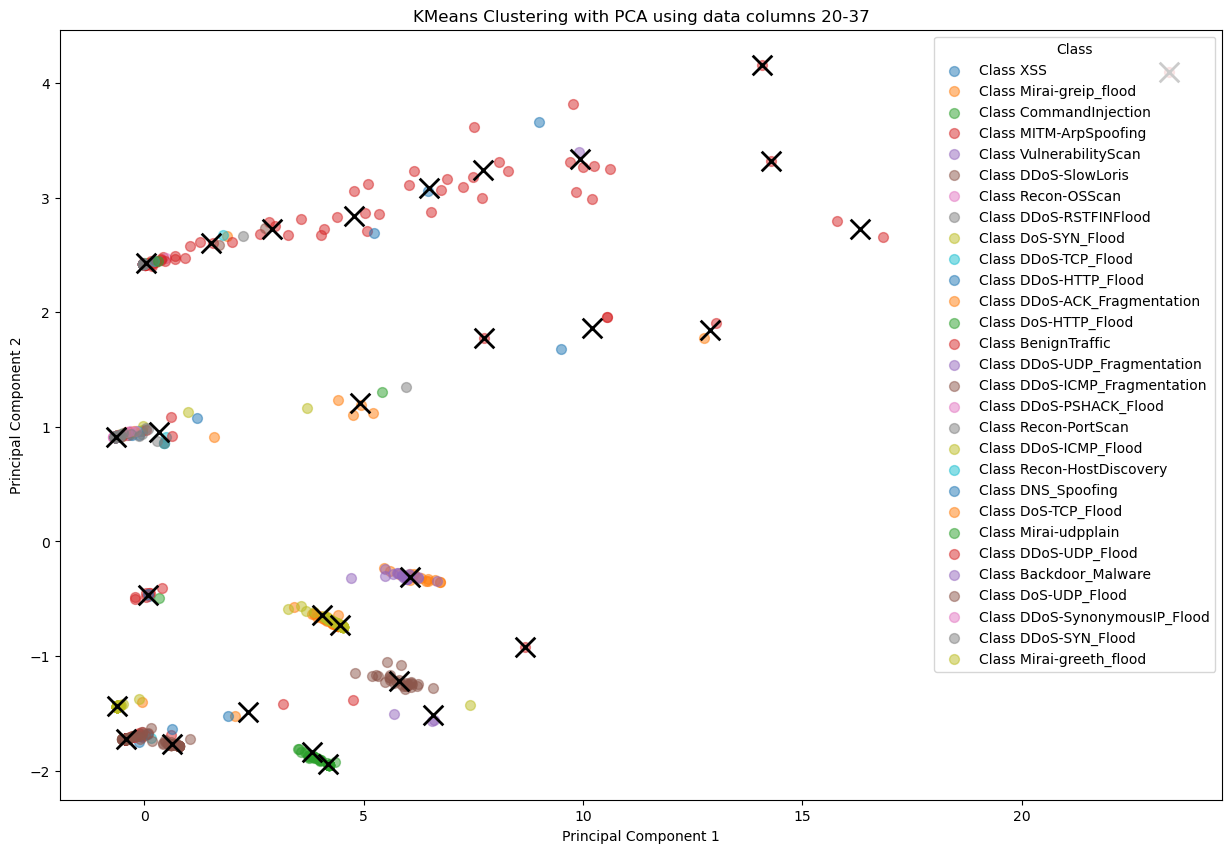

In [29]:

a1_data = pd.read_csv(r'C:\Users\powde\OneDrive\Documents\Western\CS_303_Machine_Learning\FINAL PROJECT\train2.csv', header=None, skiprows=1)

R = 20
Y = 37

X = a1_data.iloc[:, R:Y].values
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_standardized)


class_labels = a1_data.iloc[:, -1].values


kmeans = KMeans(n_clusters=30, n_init=10)  
kmeans.fit(X_pca)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.figure(figsize=(15, 10))


unique_labels = set(class_labels)
for label in unique_labels:
    indices = class_labels == label
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=f'Class {label}', s=50, alpha=0.5)


plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='black', s=200, linewidths=2)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with PCA using data columns '+ str(R)+"-"+str(Y))
plt.legend(title='Class', loc='upper right')
plt.show()



# experiment with algorithms, feature sets, parameters, etc.,

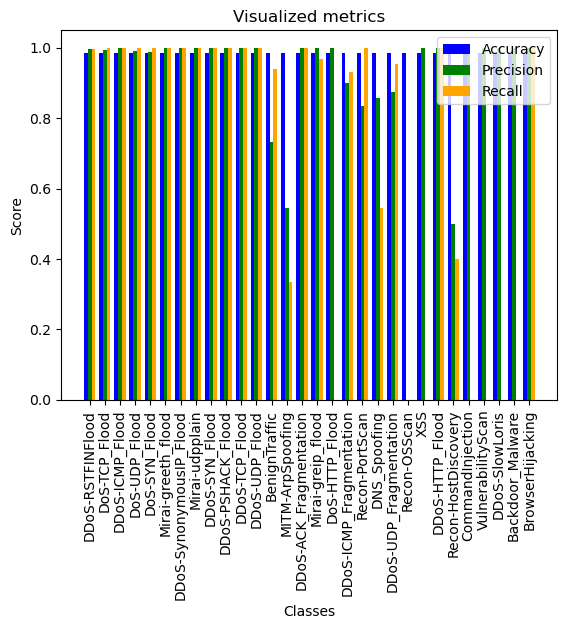

Accuracy: 0.9851612903225806
Precision: [0.9964539  0.99418605 1.         0.99118943 0.98648649 1.
 1.         1.         1.         1.         1.         1.
 0.73255814 0.54545455 1.         1.         1.         0.9
 0.83333333 0.85714286 0.875      0.         1.         1.
 0.5        1.         1.         1.         1.         1.        ]
Recall: [0.9964539  1.         0.99785867 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.94029851 0.33333333 1.         0.96666667 0.         0.93103448
 1.         0.54545455 0.95454545 0.         0.         1.
 0.4        0.         0.         0.         0.         1.        ]


In [28]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='ball_tree', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
yp = cross_val_predict(knn, x, y, cv=cv)
output_labels = ['DDoS-RSTFINFlood', 'DoS-TCP_Flood', 'DDoS-ICMP_Flood', 'DoS-UDP_Flood',
 'DoS-SYN_Flood', 'Mirai-greeth_flood', 'DDoS-SynonymousIP_Flood',
 'Mirai-udpplain', 'DDoS-SYN_Flood', 'DDoS-PSHACK_Flood', 'DDoS-TCP_Flood',
 'DDoS-UDP_Flood', 'BenignTraffic', 'MITM-ArpSpoofing',
 'DDoS-ACK_Fragmentation', 'Mirai-greip_flood', 'DoS-HTTP_Flood',
 'DDoS-ICMP_Fragmentation', 'Recon-PortScan', 'DNS_Spoofing',
 'DDoS-UDP_Fragmentation','Recon-OSScan', 'XSS', 'DDoS-HTTP_Flood',
 'Recon-HostDiscovery', 'CommandInjection', 'VulnerabilityScan',
 'DDoS-SlowLoris', 'Backdoor_Malware', 'BrowserHijacking']
acc = accuracy_score(y, yp)
per = precision_score(y, yp, average=None, zero_division=1, labels=output_labels)
rec = recall_score(y, yp, average=None, zero_division=1,labels=output_labels)

labels = output_labels
accuracy = [acc] * len(labels)
bar_width = 0.25
index = np.arange(len(labels))
plt.bar(index, accuracy, bar_width, label='Accuracy', color='blue')
plt.bar(index + bar_width, per, bar_width, label='Precision', color='green')
plt.bar(index + 2 * bar_width, rec, bar_width, label='Recall', color='orange')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.title('Visualized metrics')
plt.xticks(index + bar_width, labels, rotation=90) 
plt.legend()
plt.show()
print("Accuracy:", acc)
print("Precision:", per)
print("Recall:", rec)

In [15]:
train_data = pd.read_csv(r'C:\Users\powde\OneDrive\Documents\Western\CS_303_Machine_Learning\FINAL PROJECT\train2.csv', header=None)
df = pd.read_csv(r'C:\Users\powde\OneDrive\Documents\Western\CS_303_Machine_Learning\FINAL PROJECT\train2.csv')
train_data = train_data.drop(0)

feature_indices = [5,4,39]
column_names = [df.columns[i] for i in feature_indices]

X_train = train_data.iloc[:, feature_indices]
y_train = train_data.iloc[:, -1]

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


predictions_train = model.predict(X_train)

accuracy = accuracy_score(y_train, predictions_train)
precision = precision_score(y_train, predictions_train, average='micro')
recall = recall_score(y_train, predictions_train, average='micro')
print(feature_indices)
print(column_names)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

[5, 4, 39]
['Srate', 'Rate', 'IAT']
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


# visualize experimental results

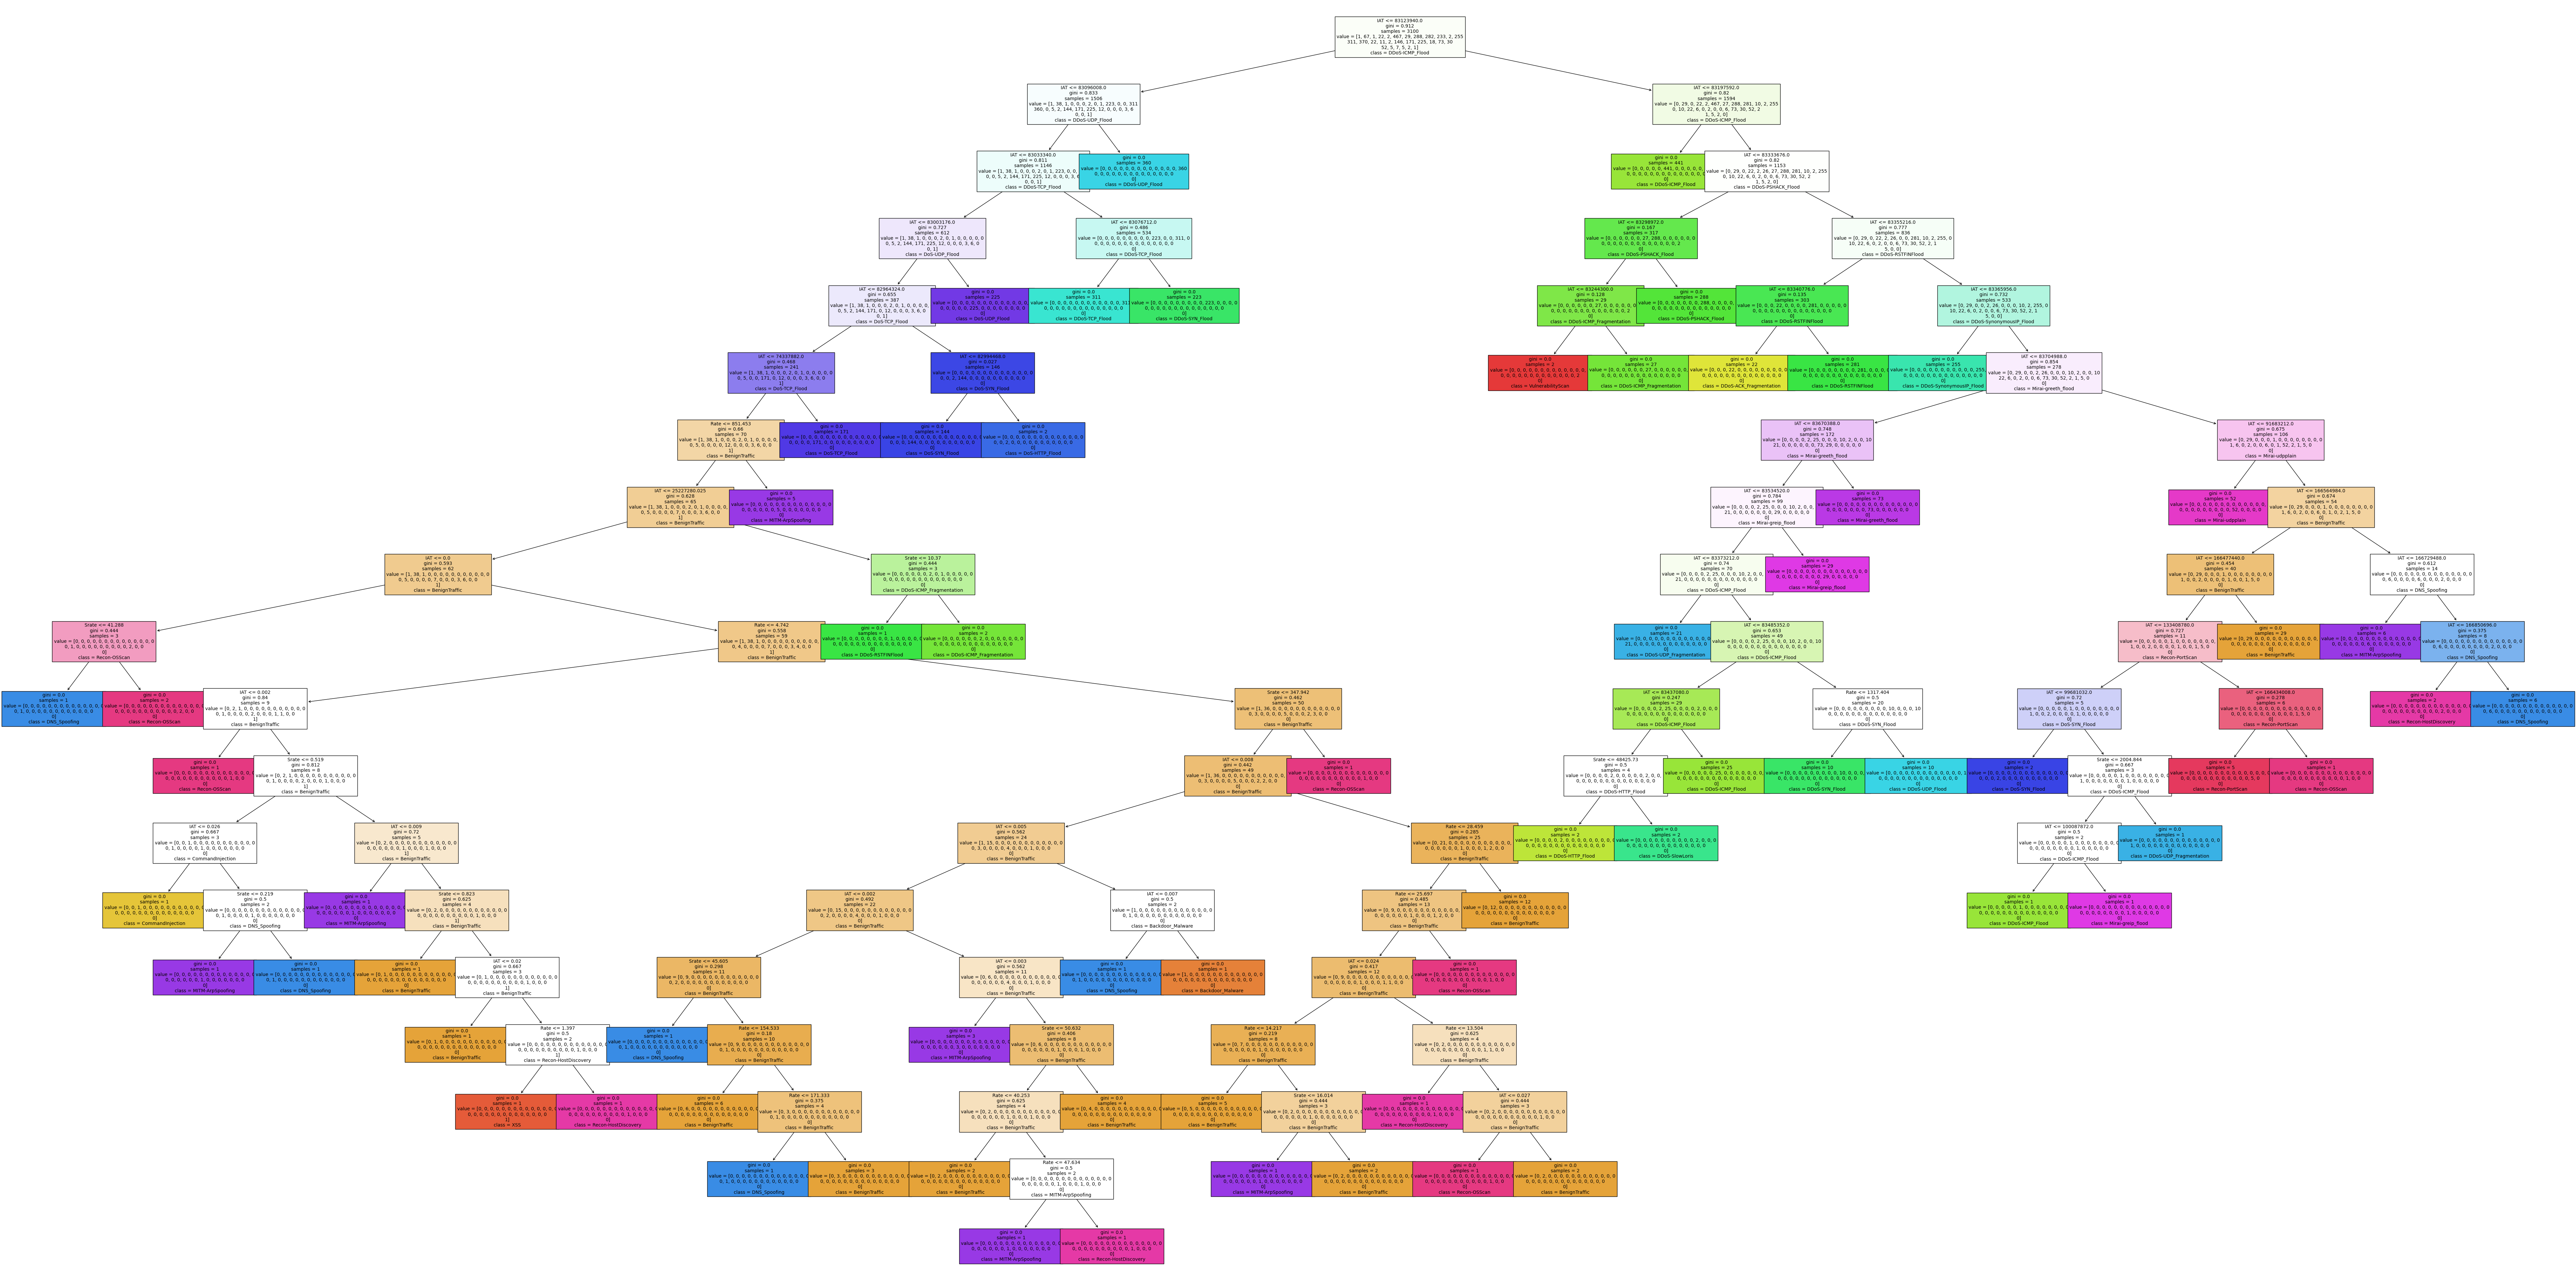

In [27]:
plt.figure(figsize=(100,50))
plot_tree(model, filled=True, feature_names=column_names, class_names=model.classes_, fontsize=10)
plt.show()

[5, 4, 39]
['Srate', 'Rate', 'IAT']
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


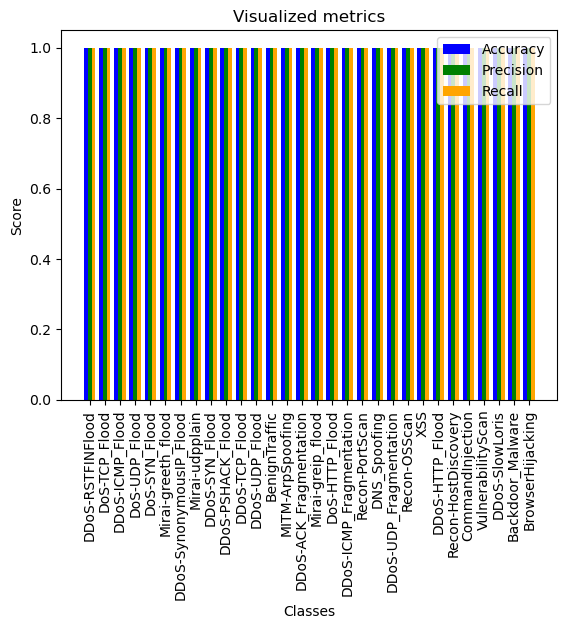

In [26]:
train_data = pd.read_csv(r'C:\Users\powde\OneDrive\Documents\Western\CS_303_Machine_Learning\FINAL PROJECT\train2.csv', header=None)
df = pd.read_csv(r'C:\Users\powde\OneDrive\Documents\Western\CS_303_Machine_Learning\FINAL PROJECT\train2.csv')
train_data = train_data.drop(0)
feature_indices = [5,4,39]
column_names = [df.columns[i] for i in feature_indices]
X_train = train_data.iloc[:, feature_indices]
y_train = train_data.iloc[:, -1]
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions_train = model.predict(X_train)
accuracy = accuracy_score(y_train, predictions_train)
precision = precision_score(y_train, predictions_train, average='micro')
recall = recall_score(y_train, predictions_train, average='micro')
print(feature_indices)
print(column_names)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


acc  = accuracy_score(y_train, predictions_train)
per = precision_score(y_train, predictions_train, average='micro')
rec = recall_score(y_train, predictions_train, average='micro')
labels = output_labels
accuracy = [acc] * len(labels)
bar_width = 0.25
index = np.arange(len(labels))
plt.bar(index, accuracy, bar_width, label='Accuracy', color='blue')
plt.bar(index + bar_width, per, bar_width, label='Precision', color='green')
plt.bar(index + 2 * bar_width, rec, bar_width, label='Recall', color='orange')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.title('Visualized metrics')
plt.xticks(index + bar_width, labels, rotation=90) 
plt.legend()
plt.show()

test data
[5, 4, 39]
['Srate', 'Rate', 'IAT']
Accuracy: 0.983225806451613
Precision: 0.983225806451613
Recall: 0.983225806451613


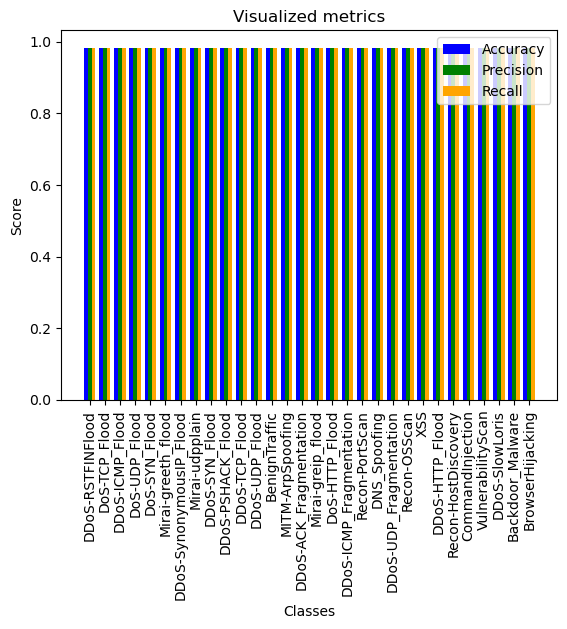

In [23]:
test_data = pd.read_csv(r'C:\Users\powde\OneDrive\Documents\Western\CS_303_Machine_Learning\FINAL PROJECT\test.csv', header=None)
test_data = test_data.drop(0)
test_labels = pd.read_csv(r'C:\Users\powde\OneDrive\Documents\Western\CS_303_Machine_Learning\FINAL PROJECT\testdatalabels.csv')


X_test = test_data.iloc[:, feature_indices]
predictions = model.predict(X_test)

accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions, average='micro')
recall = recall_score(test_labels, predictions, average='micro')
print("test data")
print(feature_indices)
print(column_names)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

acc= accuracy_score(test_labels, predictions)
per= precision_score(test_labels, predictions, average='micro')
rec = recall_score(test_labels, predictions, average='micro')
labels = output_labels
accuracy = [acc] * len(labels)
bar_width = 0.25
index = np.arange(len(labels))
plt.bar(index, accuracy, bar_width, label='Accuracy', color='blue')
plt.bar(index + bar_width, per, bar_width, label='Precision', color='green')
plt.bar(index + 2 * bar_width, rec, bar_width, label='Recall', color='orange')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.title('Visualized metrics')
plt.xticks(index + bar_width, labels, rotation=90) 
plt.legend()
plt.show()

In [25]:

predictions_df = pd.DataFrame({ 'Original': test_labels.iloc[:, -1],'Predictions': predictions})
predictions_df.to_csv(r'C:\Users\powde\OneDrive\Documents\Western\CS_303_Machine_Learning\FINAL PROJECT\predictions.csv', index=False)
print(predictions_df)

               Original        Predictions
0        DDoS-TCP_Flood     DDoS-TCP_Flood
1     DDoS-PSHACK_Flood  DDoS-PSHACK_Flood
2         DoS-UDP_Flood      DoS-UDP_Flood
3         DoS-TCP_Flood      DoS-TCP_Flood
4        DDoS-SYN_Flood     DDoS-SYN_Flood
...                 ...                ...
3095    DDoS-ICMP_Flood    DDoS-ICMP_Flood
3096     DDoS-UDP_Flood     DDoS-UDP_Flood
3097    DDoS-ICMP_Flood    DDoS-ICMP_Flood
3098  Mirai-greip_flood  Mirai-greip_flood
3099     DDoS-SYN_Flood     DDoS-SYN_Flood

[3100 rows x 2 columns]


# analyze / explain experimental results

Conclusion

Looking at how I started this project and thinking about how hard this is going to be, but you got me intrigued in it and once I looked at it, I knew it was the one. Starting with just trying this data set in everything that we have built over the semester and starting with some visualization of the data set and when I did the whole data set it broke my kernel repeatedly but would take its till to do it first. So, I sized it down big time going from 1.19 million to 3100 why 3100 that’s how long my patience was with excels selecting though this large of a .csv file. After talking to you and I came back to boxplot. After getting the features, having a boxplot for each label, and playing with logs to scale the outliers. Individually I could log scale a negative number set but once I put it into a loop for the subplot of all the boxplots, I was getting a warning saying you can’t log scale a negative number, this would still show the subplot and boxplots on these features that had the negative data. So, I put in an if statement to set yscale to log and an else to scale linear witch is the default.  Worked out pretty well and played with a few different logs 2,10, and e but it would only really change one or two labels in one or two features it seemed hard to see direct changes. Linear regression was also useless as I have all these features and it limits you on what you can visualize. Scatter plots are where things somewhat came together, finding some features that you could see some groups of classes but still just not very good. Until you use Kmeans and PCA, this is where you get the groups, and the centroids have some very solid classes identified so I started down this path and using the metrics you find there where a few classes that didn’t have the best scores. Still in this model there is one class recon_OSScan that couldn’t be grouped together no matter what features used to get there, it seems to cross over into at least 8 different classes. Also, having issues with Benign Traffic, Recon-Host Discovery, XSS, Dos-HTTP Flood, MITM -Arp Spoofing, Command line Injection, Vulnerability scan, DDoS-Slow Loris, Backdoor malware, and browser hijacking. So too many classes have issues. It’s working and putting in predictions but nothing to brag about. So next up was DTC and boy howdy did that work out. The first one I did and got back the metrics I was shocked and at that point I was still using most of the features from 35 to 40 which turns out most of the improvement from Kmeans/PCA model was all from class 39 IAT Interval arrival time which is how much time between two packets being sent forward or by flow with a mean max min attribute. This was with just playing with the features and seeing what worked best eventually looking at the data and finding other columns with multiple digit values this is where I found Srate and Rate. Srate is the sampling rate by day or hour breakdown, and rate is the I believe is the packet per second. Once you put all three in and use the training data, we get 100 across the metrics. So, is this overfit?  Well after trying to find something to change I didn’t like anything I found with other features or just two features, so I put it to some test data from a different part of the original data set that I dropped the labels of and put up a predictions data frame to see if this works. And great success! Building the metrics to show this on the test data since I still have the labels, I’m getting 98% on the metrics and looking thought the predictions data frame you can see that its still the recon classes that have a few issues, but overall, I’m very happy with 98%. This turned-out way better than I ever expected it to.  Learning way more about what kMeans/PCA is doing but more so what you can do with a DTC and if you get a DTC visualized with the rage in each leaf it’s a very good visual of how the tree chooses its label by range.
Thanks for a good year and a fun challenging class!

